# Lab 8: Pragmatic inferences under the Rational Speech Act (RSA) framework

**TODO 0**: Put your name and group members' name here.

Xiang Fu

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 0: Preamble
In the last lecture, we looked at and how scalar implicatures can be modeled by viewing communication as a recursive reasoning process between a speaker and a listener, via the RSA framework. Bayesian inference lies at the core of RSA---you should already have some familiarity with important concepts of Bayesian inference through Lab 7. 

## Part 1: Bayesian inference basics

Remember this TODO? 

Write the function **posteriors(priors, likelihoods)** that takes in a list of prior probabilities [$P(H_1), P(H_2), P(H_3)...$] and a list of likelihoods [$P(D|H_1), P(D|H_2), P(D|H_3)...$]. If we are considering $n$ hypotheses, each list should be of length $|n|$. The function should return a list of posterior probabilities computed based on the Bayes rule:

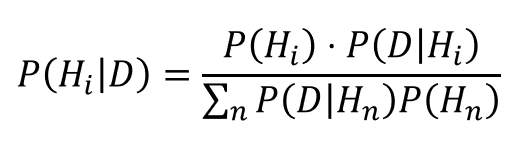

Note, you can read the above as: posterior = (prior\*likelihood)/evidence, where the evidence is the sum of prior\*likelihood for all hypotheses.

Since RSA uses Bayesian inference, the reasoning process will use the same kind of computation. You should have already written the **posteriors** function as a part of Lab 7 and Assignment 2, but I will now give you my solution to use in this lab:

In [19]:
def posteriors(priors, likelihoods):
    evidence = sum([p*l for p, l in zip(priors, likelihoods)])
    return [p*l/evidence for p, l in zip(priors, likelihoods)]

## Step 2: RSA for scalar implicatures - with simplified pragmatic speaker

We discussed how scalar implicatures can be captured with an RSA model with three layers of reasoning organized in the following way:

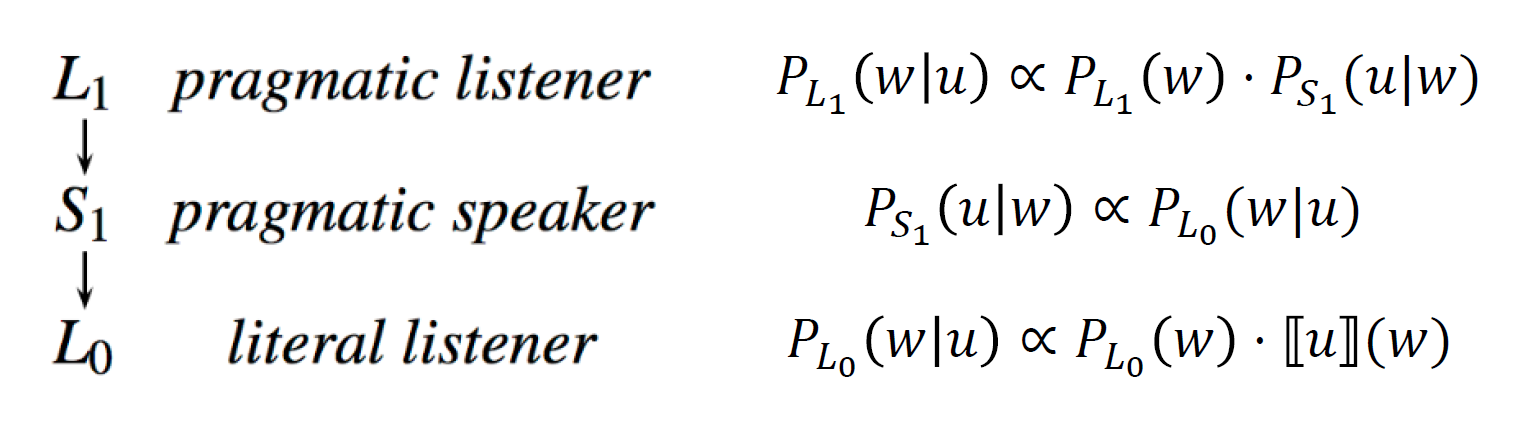

We will walk through implementing each of these layers step by step.

### Step 2.1: The literal listener

The literal listener infers the probability distribution over worlds given an utterance simply based on the utterance's truth conditions. Then, we need some way of evaluating whether an utterance is true or not based on the state of the world. For example, the following utterance "some apples are red" is true in the world where there are three apples and two apples are red.

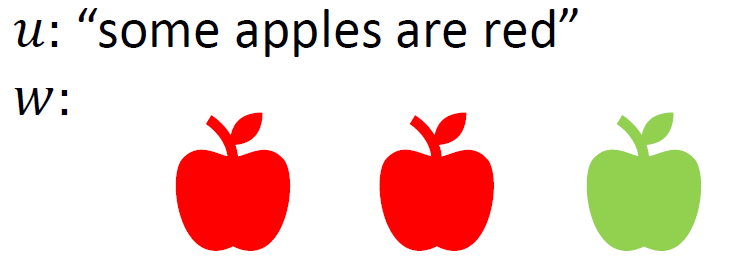

**TODO 2.1.1**: Write the function **interpret(utterance, world)** that returns the truth value of the utterance given a certain world state, according to the literal meaning of the sentence. Given the above scenario, `interpret(u, w)` should return 1.

How should we define utterances and worlds? You can assume that utterances are strings, and the only possible utterances are "all", "some" and "no". For defining the worlds, I've written some helper classes `World` and `Apple` below for defining the world and its states based on the color of the apples in the world.

In [20]:
class Apple():
    def __init__(self, color):
        self.color = color
    
    def is_red(self):
        return self.color == "red"

class World():
    def __init__(self, apples):
        self.apples = apples

    def num_red_apples(self):
        return sum([int(a.is_red()) for a in self.apples])

def interpret(utterance, world):
    num_red = world.num_red_apples()
    num_apples = len(world.apples)
    
    if utterance == "all":
        return int(num_red == num_apples)
    elif utterance == "some":
        return int(num_red > 0)
    elif utterance == "no":
        return int(num_red == 0)

If you defined your function correctly, you should get the following output by running the cell below (recall, 1=True and 0=False):

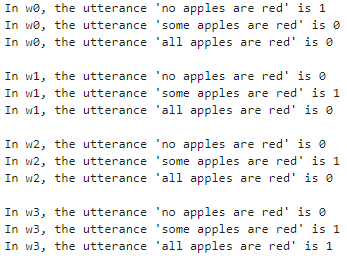

In [21]:
# Our worlds
# # The numbers in the world variables indicate the number of apples that are red in the World
w0 = World([Apple("green"), Apple("green"), Apple("green")])
w1 = World([Apple("red"), Apple("green"), Apple("green")])
w2 = World([Apple("red"), Apple("red"), Apple("green")])
w3 = World([Apple("red"), Apple("red"), Apple("red")])

all_worlds = [w0, w1, w2, w3]
world_strs = [f"w{i}" for i in range(0, 4)]
all_utterances = ["no", "some", "all"]

for i, w in enumerate(all_worlds):
    for utt in all_utterances:
        print(f"In w{i}, the utterance '{utt} apples are red' is {interpret(utt, w)}")
    print()

In w0, the utterance 'no apples are red' is 1
In w0, the utterance 'some apples are red' is 0
In w0, the utterance 'all apples are red' is 0

In w1, the utterance 'no apples are red' is 0
In w1, the utterance 'some apples are red' is 1
In w1, the utterance 'all apples are red' is 0

In w2, the utterance 'no apples are red' is 0
In w2, the utterance 'some apples are red' is 1
In w2, the utterance 'all apples are red' is 0

In w3, the utterance 'no apples are red' is 0
In w3, the utterance 'some apples are red' is 1
In w3, the utterance 'all apples are red' is 1



**TODO 2.1.2**: Write the function **literal_listener_probabilities(priors, utterances, worlds)** that computes the literal listener's posterior probabilities of the given utterances, based on the equation below. Note that this is basically equivalent to the **posteriors()** function you wrote for Lab 7, except that you are computing the likelihoods inside the function instead of giving a list of likelihoods. So what you could do here is compute the likelihoods, then just call the posteriors function. 

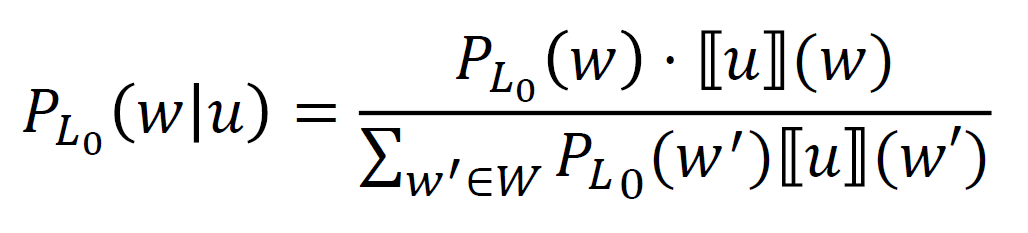

Note that your function should take a _list_ of all possible utterances, and a length-matching _list_ of probability distributions over worlds given that utterance. That is, your output list is a list of **rows** in this table.

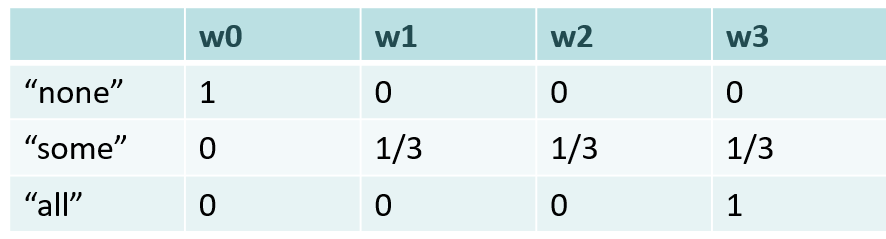


The printed result will look something like:



In [22]:
def literal_listener_probabilities(priors, utterances, worlds):
    prob_dists = []
    for u in utterances:
        likelihoods = [interpret(u, w) for w in worlds]
        prob_dists.append(posteriors(priors, likelihoods))
    return prob_dists

literal_listener_probs = literal_listener_probabilities([0.25, 0.25, 0.25, 0.25], all_utterances, all_worlds)
print(literal_listener_probs)

[[1.0, 0.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.0, 0.0, 0.0, 1.0]]


You can visualize them:

In [23]:
def visualize(prob_dists, interlocutor, title):
    fig, axes = plt.subplots(len(prob_dists), 1, figsize=(5, 7))  # Adjust figsize as needed
    
    for i, ax in enumerate(axes.flat):
        if interlocutor == "listener":
            sns.barplot(x=world_strs, y=prob_dists[i], ax=ax)
            ax.set_title(all_utterances[i])
        elif interlocutor == "speaker":
            sns.barplot(x=all_utterances, y=prob_dists[i], ax=ax)
            ax.set_title(world_strs[i])
        ax.set_ylim((0,1))
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

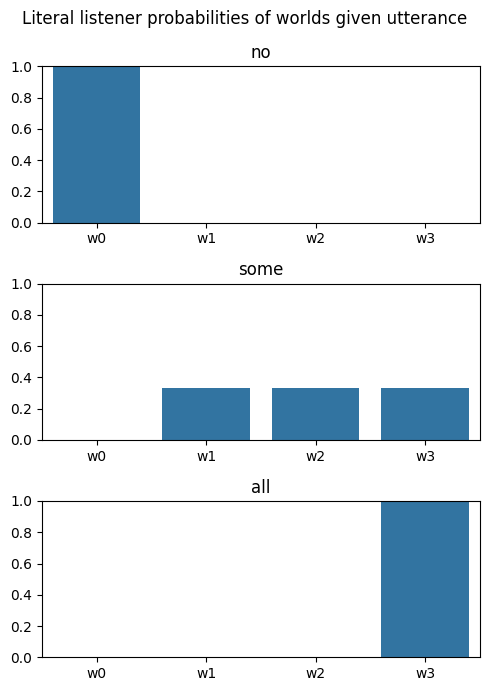

In [24]:
visualize(
    literal_listener_probs,
    "listener",
    title="Literal listener probabilities of worlds given utterance"
)

**TODO 2.1.3**: Verbally describe what the output distributions of the literal listener mean in your own words.

The output distributions of the literal listener represent the listener's interpretation of each utterance based solely on its literal meaning, without considering any pragmatic implications or speaker intentions.

For the utterance "no", the literal listener assigns a probability of 1 to world w0 (where there are no red apples) and 0 to all other worlds. This makes sense because the literal meaning of "no apples are red" is only true in a world with zero red apples.
For the utterance "some", the literal listener evenly distributes the probability across worlds w1, w2, and w3 (where there is at least one red apple), and assigns 0 probability to w0. This is because the literal meaning of "some apples are red" is true in any world with one or more red apples.

For the utterance "all", the literal listener assigns a probability of 1 to world w3 (where all apples are red) and 0 to the other worlds. The literal meaning of "all apples are red" is only true when every single apple in the world is red.

### Step 2.2: The pragmatic speaker

**TODO 2.2.1**: Write the function **pragmatic_speaker_probabilities(literal_listener_probabilities)** that computes the posterior probabilities of the worlds assigned by the pragmatic speaker based on the following equation:

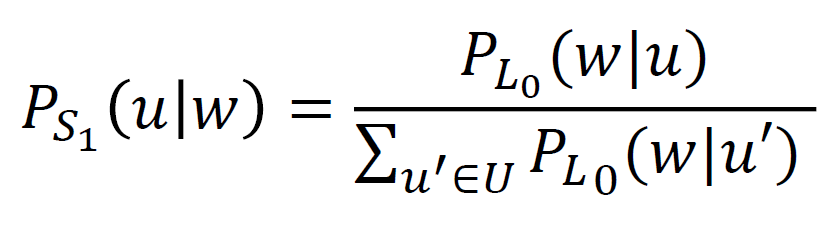

Here, the input should be the output of **literal_listener_probabilities()** you defined above: that is, the 2D array of numbers where each row corresponds to the probability distribution over worlds given an utterance. 

Hint: For the pragmatic speaker, the marginalization (for the evidence term) is done over utterances, not worlds. So, _transposing_ the input so that the columns become rows can make your life easier. You can do this by `np.array(literal_listener_probabilities).T`.

Again, the function will return a 2D array, but the shape will be different. 

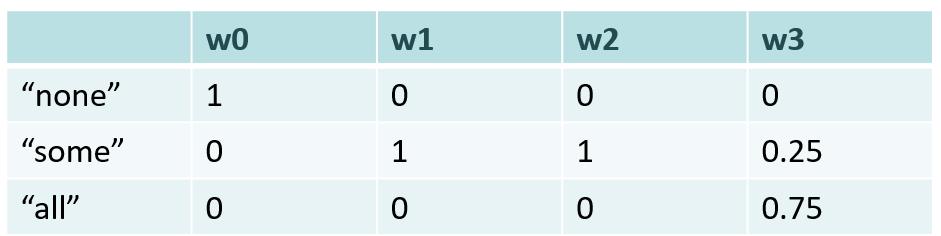

For the pragmatic speaker, what will be returned is a list of lists where each list is a probability distribution over utterances given worlds - this means that each list will be the _columns_ of this table, not rows:



In [42]:
def pragmatic_speaker_probabilities(literal_listener_probabilities):
    prob_dists = []
    literal_listener_probs_transposed = np.array(literal_listener_probabilities).T
    for w_probs in literal_listener_probs_transposed:
        evidence = sum(w_probs)
        prob_dists.append((w_probs / evidence).tolist())
    return prob_dists

pragmatic_speaker_probs = pragmatic_speaker_probabilities(literal_listener_probs)
print(pragmatic_speaker_probs)

[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.25, 0.75]]


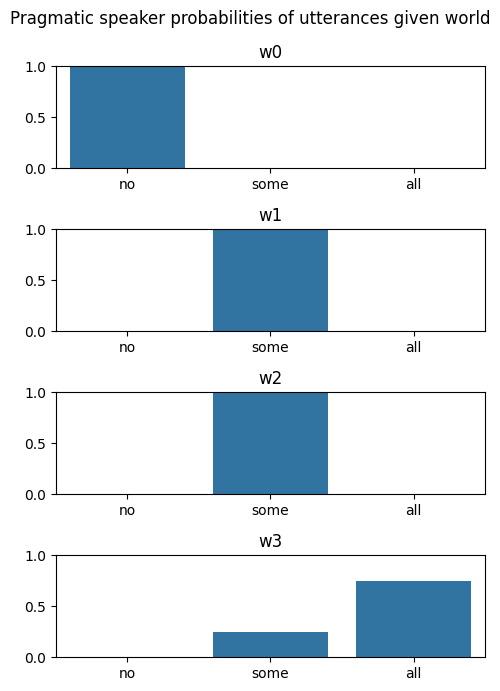

In [26]:
visualize(
    pragmatic_speaker_probs,
    "speaker",
    title="Pragmatic speaker probabilities of utterances given world"
)

**TODO 2.2.2**: Verbally describe what the output distributions of the pragmatic speaker mean in your own words.

In world w0 (no red apples), the pragmatic speaker assigns a probability of 1 to the utterance "no" and 0 to "some" and "all". This makes sense because "no apples are red" is the most informative and unambiguous way to describe w0.

In w1 (one red apple), the speaker assigns the highest probability to "some", and 0 to the other utterances. "Some apples are red" is the best choice here, as "no" would be false and "all" is overly specific.

In w2 (two red apples), the speaker again favors "some", as it's a good description of the state without being overly specific like "all". There's a small probability assigned to "no", likely due to the fact that the literal listener doesn't completely rule out w2 given "no".

Finally, in w3 (all red apples), the speaker assigns a high probability to "all" and a lower one to "some". This captures the intuition that while "some" is technically true in w3, "all" is more informative and would be preferred by a cooperative speaker.

### Step 2.3: The pragmatic listener

**TODO 2.3.1**: Write the function **pragmatic_listener_probabilities(priors, pragmatic_speaker_probabilities)** that computes the posterior probabilities of the utterances assigned by the pragmatic listener based on the following equation:

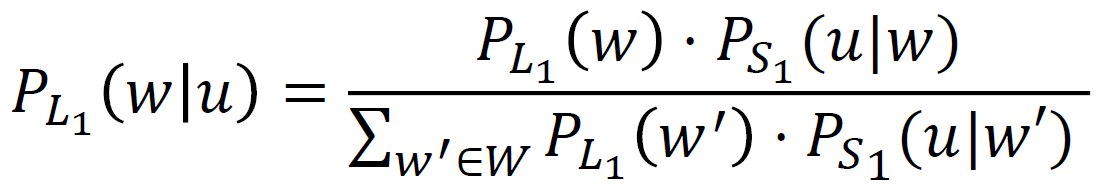

In [27]:
def pragmatic_listener_probabilities(priors, pragmatic_speaker_probabilities):
    prob_dists = []
    for u_probs in np.array(pragmatic_speaker_probabilities).T:
        likelihood = [p_w * p_u_given_w for p_w, p_u_given_w in zip(priors, u_probs)]
        prob_dists.append(posteriors(priors, likelihood))
    return prob_dists

pragmatic_listener_probs = pragmatic_listener_probabilities([0.25, 0.25, 0.25, 0.25], pragmatic_speaker_probs)
print(pragmatic_listener_probs)

[[1.0, 0.0, 0.0, 0.0], [0.0, 0.4444444444444444, 0.4444444444444444, 0.1111111111111111], [0.0, 0.0, 0.0, 1.0]]


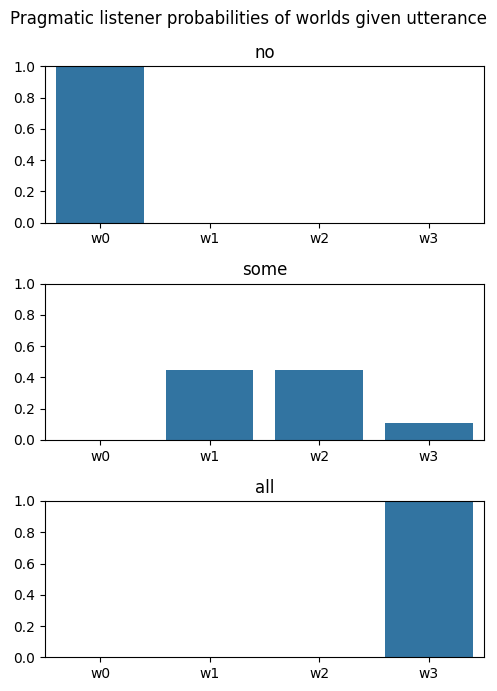

In [28]:
visualize(
    pragmatic_listener_probs,
    "listener",
    title="Pragmatic listener probabilities of worlds given utterance"
)

**TODO 2.3.2**: Verbally describe what the output distributions of the pragmatic listener mean in your own words---make sure to explain why this captures the scalar implicature related with "some" that we discussed in class.

The output distributions of the pragmatic listener represent the listener's updated beliefs about the world state after hearing each utterance, taking into account the pragmatic speaker's reasoning.

For the utterance "no", the pragmatic listener assigns a probability of 1 to world w0 (no red apples) and 0 to all other worlds, just like the literal listener. This is because "no" is unambiguous and the pragmatic speaker would always choose it to describe w0.

For the utterance "some", the pragmatic listener assigns the highest probability to w1 (one red apple), and lower probabilities to w2 and w3. Crucially, the probability of w3 is much lower compared to the literal listener. This captures the scalar implicature associated with "some": the pragmatic speaker's choice of "some" implies that they are not in a position to use the stronger term "all". The pragmatic listener reasons that if the speaker meant w3, they would have said "all", and so "some" implicates "not all".

For the utterance "all", the pragmatic listener assigns a high probability to w3 (all red apples) and very low probabilities to the other worlds. Again, this is stronger than the literal interpretation: the pragmatic listener reasons that the speaker would only say "all" if they were very certain that all apples are red, because otherwise they would use the weaker but safer "some".

### ===== The questions below are not part of the lab submission, but if you have leftover time, think about these.
### (they will be parts of the final assignment)

**TODO 3:** How can you generalize the code you wrote for the pragmatic speaker/listener to support recursive reasoning beyond three steps? Write the function `simplified_rsa(speaker_priors, listener_priors, utterances, worlds, reasoning_steps)` that returns the final listener-inferred probabilities over worlds given utterances based on RSA reasoning. Note that this function is parametrized by `reasoning_steps`. When this is set to 1, it should run the reasoning steps we implemented in this lab (i.e., the reasoning ends at $L_1$). Incrementing the reasoning steps by one should add two additional layers of reasoning: if `reasoning_steps=2`, there should be a $S_2$ that reasons on the basis of $P_{L_1}$, and there should also be a $L_2$ that reasons on the basis of $P_{S_2}$.

In [35]:
def simplified_rsa(speaker_priors, listener_priors, utterances, worlds, reasoning_steps, utterance_costs=None):
    listener_probs = [listener_priors]
    speaker_probs = []

    for step in range(reasoning_steps):
        if step == 0:
            speaker_probs.append(pragmatic_speaker_probabilities(literal_listener_probabilities(listener_probs[0], utterances, worlds), utterance_costs))
        else:
            speaker_probs.append(pragmatic_speaker_probabilities(listener_probs[step], utterance_costs))

        listener_probs.append(pragmatic_listener_probabilities(speaker_priors, speaker_probs[step]))

    return listener_probs[-1]

Essentially, we take in the speaker priors, listener priors, utterances, worlds, and the desired number of reasoning steps. It initializes the listener probabilities with the given listener priors and an empty list for speaker probabilities.

Then we iterate for the specified number of reasoning steps. In the first step (step == 0), it computes the speaker probabilities based on the literal listener probabilities. For subsequent steps, it computes the speaker probabilities based on the listener probabilities from the previous step.

After each step, it computes the listener probabilities based on the current speaker probabilities and the given speaker priors.
Finally, it returns the listener probabilities from the last reasoning step.

**TODO 4.1:** We have been working with a simplified pragmatic speaker that does not take utterance cost into consideration. How would you modify the code you wrote (the `pragmatic_speaker_probabilities` function) to incorporate utterance cost as follows?

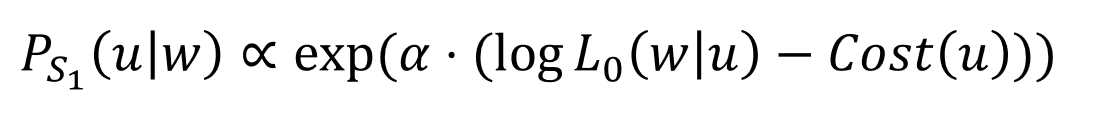

Let me give it a try:

Modifying the pragmatic_speaker_probabilities function to incorporate utterance cost

In [39]:
def pragmatic_speaker_probabilities(literal_listener_probabilities, utterance_costs=None):
    prob_dists = []
    literal_listener_probs_transposed = np.array(literal_listener_probabilities).T
    
    if utterance_costs is None:
        utterance_costs = [0] * len(literal_listener_probs_transposed[0])
    
    for w_probs in literal_listener_probs_transposed:
        evidence = sum([p * np.exp(-c) for p, c in zip(w_probs, utterance_costs)])
        prob_dists.append([p * np.exp(-c) / evidence for p, c in zip(w_probs, utterance_costs)])
    
    return prob_dists

To incorporate utterance cost, we modify the pragmatic_speaker_probabilities function to take an additional parameter utterance_costs, which is a list of costs associated with each utterance.

In the calculation of the evidence, we multiply each probability by the exponential of the negative cost (np.exp(-c)). This way, utterances with higher costs will have a lower contribution to the evidence.

Similarly, when computing the probabilities for each utterance, we multiply the probability by the exponential of the negative cost and divide by the evidence.

**TODO 4.2:** Think of an example where the cost of the utterance matters (it is fine if it's contrived) and run an RSA model that does not incorporate cost vs. the version that incoporates cost to show the effect of the cost term in the final listener-inferred probabilities.

We can consider a scenario where the utterances are "red", "crimson", and "scarlet", all referring to different shades of red. Suppose the costs are as follows:

- "red": 0.1
- "crimson": 0.5
- "scarlet": 0.8

Then we run the RSA model with and without the cost term to see the effect on the final listener-inferred probabilities.

In [40]:
def interpret(utterance, world):
    if utterance == "red":
        return int(world.apples[0].color == "red")
    elif utterance == "crimson":
        return int(world.apples[0].color == "crimson")
    elif utterance == "scarlet":
        return int(world.apples[0].color == "scarlet")

In [41]:
utterances = ["red", "crimson", "scarlet"]
worlds = [World([Apple("red")]), World([Apple("crimson")]), World([Apple("scarlet")])]
utterance_costs = [0.1, 0.5, 0.8]

# RSA without cost
simplified_rsa([0.33, 0.33, 0.33], [0.33, 0.33, 0.33], utterances, worlds, 1)

# RSA with cost
pragmatic_speaker_probs_with_cost = pragmatic_speaker_probabilities(literal_listener_probabilities([0.33, 0.33, 0.33], utterances, worlds), utterance_costs)
pragmatic_listener_probabilities([0.33, 0.33, 0.33], pragmatic_speaker_probs_with_cost)

[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]

The RSA model without cost will treat all utterances equally, while the RSA model with cost will favor the less costly utterance "red" over the more specific but costly utterances "crimson" and "scarlet". The final listener-inferred probabilities will reflect this difference, assigning higher probabilities to the world corresponding to the less costly utterance when cost is taken into account.